In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:

df = pd.read_csv("D:\\KCE\\aiml - training\\Dataset\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
df.drop(['CustomerID'], axis=1, inplace=True)


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])   

In [64]:
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [65]:
df.isna().sum()

Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

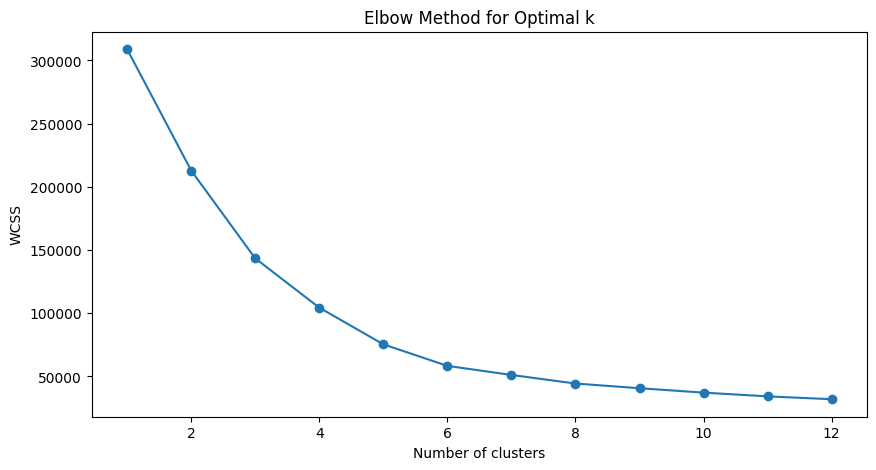

In [66]:
wcss = []
for i in range(1, 13):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 13), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


optimal k values are [5,6]

In [67]:
Kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = Kmeans.fit_predict(df)
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [68]:
Kmeans.inertia_

75399.61541401484

In [69]:
Kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

Using the feature 2 and 3 

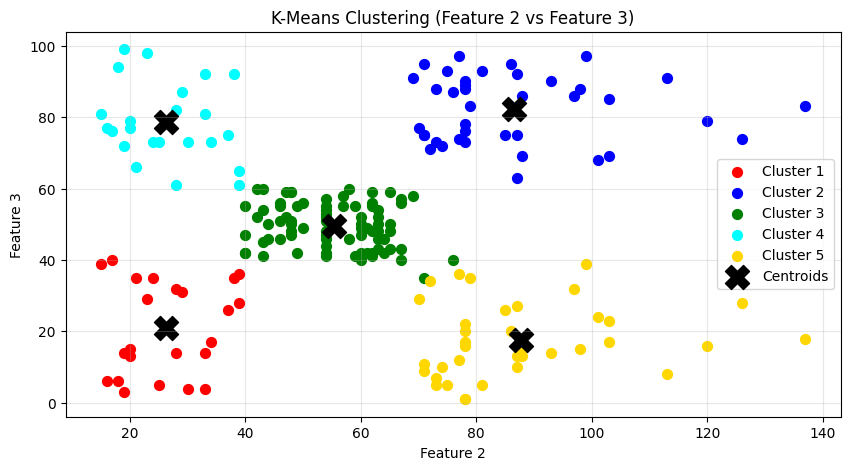

In [70]:
plt.figure(figsize=(10,5))

plt.scatter(df.iloc[y_kmeans == 0, 2], df.iloc[y_kmeans == 0, 3], s=50, c='red', label='Cluster 1')
plt.scatter(df.iloc[y_kmeans == 1, 2], df.iloc[y_kmeans == 1, 3], s=50, c='blue', label='Cluster 2')
plt.scatter(df.iloc[y_kmeans == 2, 2], df.iloc[y_kmeans == 2, 3], s=50, c='green', label='Cluster 3')
plt.scatter(df.iloc[y_kmeans == 3, 2], df.iloc[y_kmeans == 3, 3], s=50, c='cyan', label='Cluster 4')
plt.scatter(df.iloc[y_kmeans == 4, 2], df.iloc[y_kmeans == 4, 3], s=50, c='gold', label='Cluster 5')
# Centroids (same feature indices!)
plt.scatter(
    Kmeans.cluster_centers_[:, 2],
    Kmeans.cluster_centers_[:, 3],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('K-Means Clustering (Feature 2 vs Feature 3)')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
